In [1]:
# PICKLES LIBRARY

In [2]:
from spextra import SpecLibrary, Spextrum
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

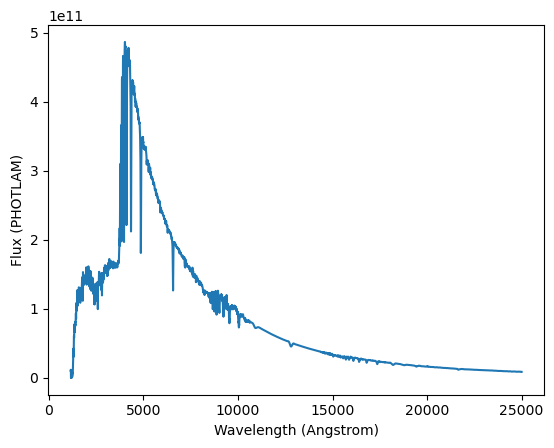

In [3]:
# RETRIEVE DATA FROM LIBRARY
lib = "nebulae"
spectra = "orion"

# NEEDS TO BE FORMATTED AS "[library]/[spectra]"
retrieve = lib + "/" + spectra
sp = Spextrum(retrieve)
sp.plot()

In [4]:
# RETRIEVE WAVELENGTH AND FLUX

wlA = np.array( sp.waveset )
flux = np.array( sp(wlA, flux_unit="PHOTLAM") )

print(wlA)
print(flux)

[ 1150.  1155.  1160. ... 24990. 24995. 25000.]
[1.05219907e+10 1.18220223e+10 8.29581697e+09 ... 8.79360003e+09
 8.79032631e+09 8.78830881e+09]


In [5]:
def plotCurve(given_wl, given_flux):

    wlnm = given_wl
    P = given_flux

    # FOR TESTING PURPOSES
    filter_low = 2000
    filter_high = 5000

    p_max = np.max(P)
    wl_max = np.max(wlnm)

    plt.figure(figsize=(8, 6))
    plt.plot(wlnm, P,label='Stellar Spectrum',color='y')

    plt.fill_between(wlnm, P, color = 'yellow', alpha = 0.3,label = 'Stellar emission')

    plt.axvline(x=filter_low, color='r', linestyle='--', label='filter cut on')
    plt.axvline(x=filter_high, color='b', linestyle='--', label='filter cut off')

    plt.fill_betweenx(y=np.linspace(min(P), max(P)+1*10**14), x1=filter_low, x2=filter_high, color='lightblue', alpha=0.4, label='filter band pass')

    plt.title('Filtered Stellar Spectrum')
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Power Density (PHOTLAM)')
    plt.xlim(0,wl_max * 1.1)
    plt.ylim(0,p_max * 1.1)

    plt.legend()
    plt.grid(True)
    plt.show()

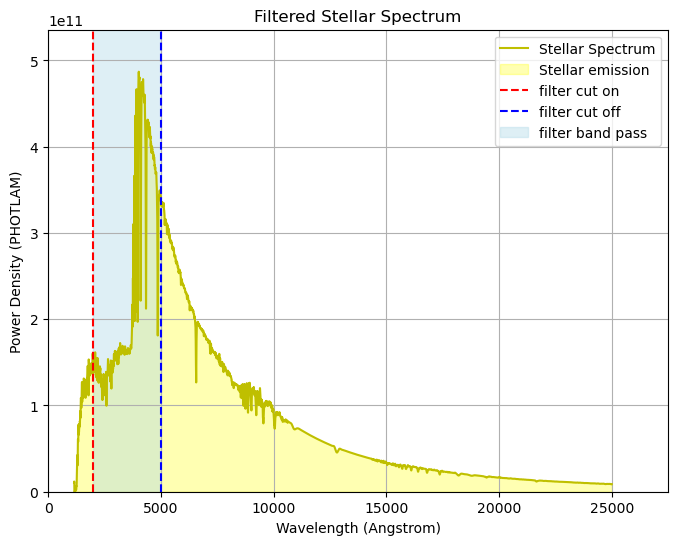

In [6]:
plotCurve(wlA, flux)